In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
raw_path = Path("data/raw/sales_data_sample.csv")
df = pd.read_csv(raw_path, encoding="latin1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
# Parse date column
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
# Aggregate by day → expenses = total sales
daily_expenses = df.groupby(df['ORDERDATE'].dt.date)['SALES'].sum().reset_index()
daily_expenses.columns = ['Date', 'TotalExpenses']
daily_expenses.to_csv("data/processed/daily_expenses.csv", index=False)
daily_expenses.head()

,Date,TotalExpenses
0,2003-01-06,12133.25
1,2003-01-09,11432.34
2,2003-01-10,6864.05
3,2003-01-29,54702.00
4,2003-01-31,44621.96


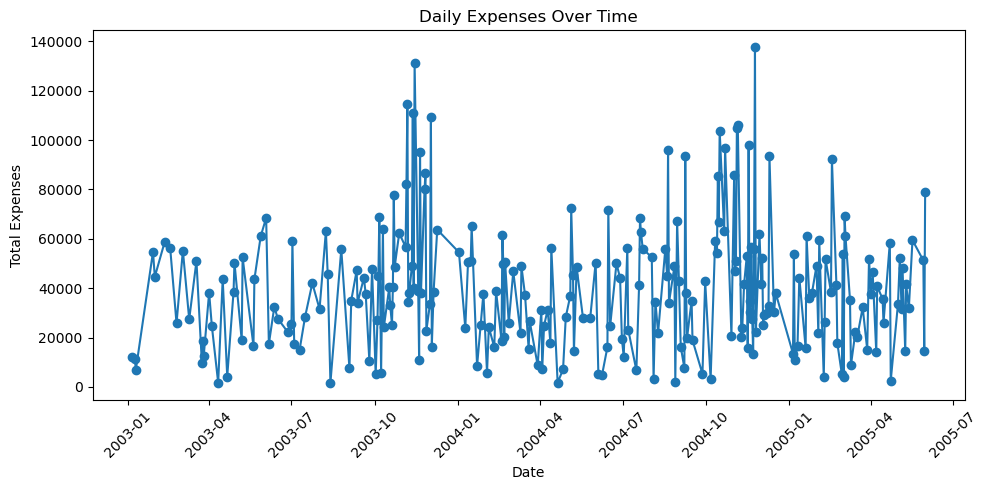

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(daily_expenses['Date'], daily_expenses['TotalExpenses'], marker='o')
plt.title('Daily Expenses Over Time')
plt.xlabel('Date')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


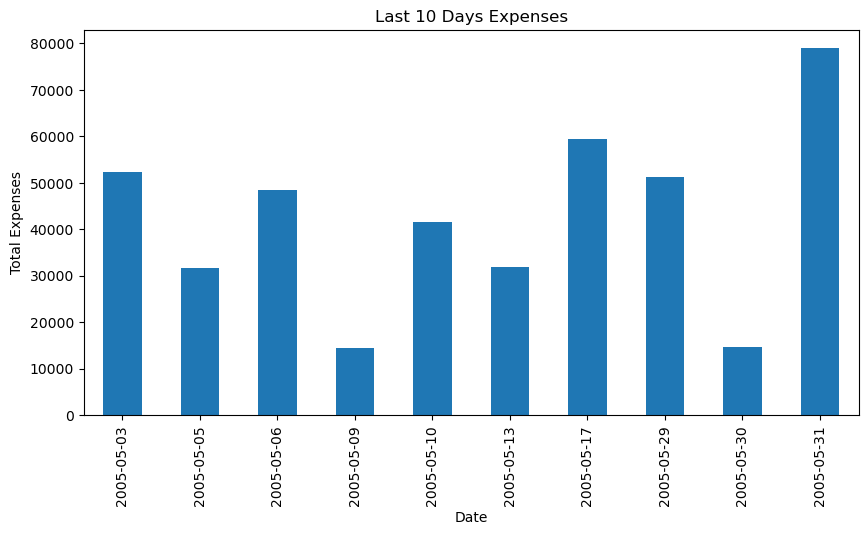

In [6]:
daily_expenses.set_index('Date').tail(10).plot(kind='bar', y='TotalExpenses', legend=False, figsize=(10, 5), title='Last 10 Days Expenses')
plt.ylabel('Total Expenses')
plt.show()

Figure saved to: C:\Projects\AI-Engineer-Roadmap-2025\Python Foundations\Week1\Day3-Matplotlib-VisualizeDailyExpenses\data\processed\daily_expenses_plot.png


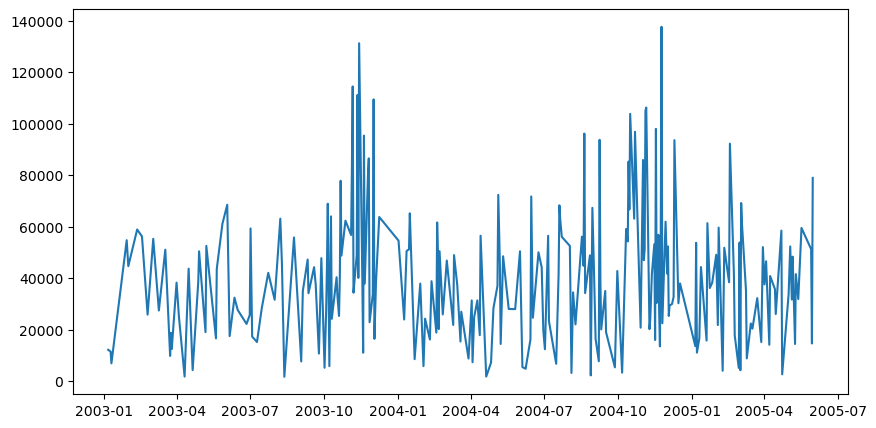

In [7]:
fig_path = Path("data/processed/daily_expenses_plot.png")
plt.figure(figsize=(10, 5))
plt.plot(daily_expenses['Date'], daily_expenses['TotalExpenses'])
plt.savefig(fig_path, dpi=150)
print("Figure saved to:", fig_path.resolve())


In [8]:
print("✅ Notebook complete. Data processed & visualized.")

✅ Notebook complete. Data processed & visualized.
